In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.utils.data import DataLoader
from hcmus.core import appconfig
from hcmus.utils import viz_utils
from hcmus.lbs import LabelStudioConnector
from hcmus.data import CroppedObjectClassificationDataset

2025-06-23 08:21:15.688 | INFO     | hcmus.core.appconfig:<module>:7 - Load DotEnv: True
/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import mlflow
experiment_name = "/PrototypicalNetworkOVR"
experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = None
if not experiment:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

In [4]:
accepted_labels = """
8934804026817-nuoc-tuong-maggi-dau-nanh-thanh-diu-chai-700ml
8934804020402-nuoc-tuong-maggi-dau-nanh-dam-dac-700ml
8936048470524-mi-tom-3-mien-gold-vi-bo-ham-rau-thom-75g
8934822201272-bia-heineken-silver-lon-250ml
5054563022592-kem-danh-rang-sensodyne-giam-e-buotlam-sang-rang-100g
8934868166344-nuoc-rua-tay-lifebouy-450ml
8934707029182-hat-nem-knorr-thit-than-xuong-ong-va-tuy-900g
8934822361211-bia-heineken-khong-con-lon-330ml
8850006932346-kem-danh-rang-colgate-maxfresh-huong-tra-xanh-225g-+-ban-chai-long-to
8850006932322-kem-danh-rang-colgate-maxfresh-huong-bac-ha-225g-+-ban-chai-long-to
6920354827792-kem-danh-rang-colgate-maxfresh-tinh-chat-than-tre-225g-+-ban-chai-long-to
8936136163314-nuoc-mam-nam-ngu-3-trong-1-750ml
8934563198152-mi-hao-hao-chay-vi-rau-nam-74gr
8935049501503-nuoc-ngot-coca-cola-vi-nguyen-ban-lon-320ml
8936048470036-mi-3-mien-mi-chay-la-da-65g-(goi)
8935001215028-tra-tea-break-milk-350ml
8935006532755-kem-rua-mat-acnes-vitamin-lam-sang-da,-mo-seo-tham-50g
8935018801641-khan-bep-da-nang-pulppy-classic-2-lop-loc-2-cuon
8935024123287-ca-phe-sua-hoa-tan-g7-3in1-hop-336g-(16g-x-21-goi)
8935006538634-dau-tay-trang-hada-labo-sach-sau-duong-am-toi-uu-200ml
8934840000093-nuoc-khoang-chanh-lemona-chai-500ml
8997035601321-nuoc-uong-bu-dien-giai-bo-sung-ion-pocari-sweat-chai-900ml
4897036693162-nuoc-tang-luc-monster-mango-loco-355ml
809939073648-soda-sua-huong-vi-chuoi-milkis-banana
8934804038131-tra-hoa-qua-nestea-hoa-tan-hop-144g-12-goi-x-12g
8936048471248-mi-tom-chua-cay-dac-biet-3-mien-gold-goi-75g
8934804027333-tra-chanh-nestea-hoa-tan-hop-195g-15-goi-x-13g
8936010530881-tra-chanh-cozy-hoa-tan-hop-240g-16-goi-x-15g
8935049510604-nuoc-ngot-sprite-chai-320ml
8934588672118-nuoc-ngot-pepsi-khong-calo-vi-chanh-320ml
8935049501572-nuoc-ngot-fanta-vi-cam-lon-320ml
8935049500445-nuoc-ngot-fanta-chai-1.5l
8936721790017-nuoc-loc-th-true-water-chai-500ml
8935049501718-nuoc-ngot-sprite-lon-320ml
8936193070013-tra-xanh-khong-do-500ml
8935137601122-tra-xanh-thai-nguyen-100g
8934564600883-tra-den-c2-vi-dua-luoi-chai-455ml
8935001214274-tra-bi-dao-wonderfarm-lon-310ml
8934588870552-tra-olong-teaplus-450ml
6920354836930-kem-danh-rang-colgate-optic-white-cong-nghe-sac-tim-100g
8935049501374-nuoc-ngot-cocacola-vi-nguyen-ban-chai-600ml
8935039570700-ca-phe-sua-robusta-birdy-lon-170ml
8934673701402-nuoc-dao-necta-vinamilk-hop-1l
8935005801012-nuoc-loc-lavie-chai-1-5l
8936079140021-ca-phe-sua-highland-coffee-lon-185ml
8934588640445-ca-phe-sua-boss-lon-180ml
8934683008614-ca-phe-sua-vinacafe-3-in-1-gold-tui-480g-24-goi-tui
8934683008867-nuoc-tang-luc-wake-up-247-vi-ca-phe-330ml
8935328600156-tra-xanh-tui-loc-phuc-long-2g-x-hop-25-goi
4902430805322-nuoc-rua-tay-diet-khuan-safeguard-trang-tinh-khiet-450ml
8936156730718-nuoc-xa-vai-blue-dam-dac-huong-thanh-xuan-tui-3.2l
8934868166825-dau-goi-sunsilk-natural-duong-ngan-gay-rung-650g
8934804040523-tra-vai-va-huong-hoa-lai-nestea-hoa-tan-hop-144g-12-goi-x-12g
8934822801335-bia-tiger-crystal-4-6-phan-tram-lon-330ml
8934868156871-dau-xa-sunsilk-mem-muot-dieu-ky-320g
8936010530713-tra-dao-cozy-hoa-tan-hop-16-goi-x-15g
8934868171850-nuoc-lau-kinh-sunlight-sieu-nhanh-sach-trong-suot-chai-520ml
8850228003541-nuoc-tang-luc-warrior-huong-dau-chai-330ml
8936193070075-nuoc-tang-luc-number-1-chai-330ml
8934588012112-nuoc-ngot-pepsi-cola-320ml
8936013254951-nuoc-rua-kinh-gift-540ml
8934868190394-nuoc-giat-comfort-huong-hoa-anh-dao-va-dao-tuoi-tui-3kg
3068320055008-nuoc-loc-evivan-chai-500ml
8936127794206-nuoc-uong-sua-trai-cay-th-true-juice-milk-huong-viet-quat-300ml
8935049511038-sua-trai-cay-nutriboost-cam-chai-1l
8934673573399-sua-tuoi-tiet-trung-co-duong,-100%-sua-tuoivinamilk-(1lit).
3760128640607-sua-tuoi-tiet-trung-promess-nguyen-kem-hop-1l
8934822212339-bia-heineken-lon-cao-330ml
8801382123446-nuoc-gao-han-quoc-loai-500ml
8936036201604-bia-hoegaarden-rosee-chai-248ml
8934692090013-bia-1664-blanc-5%-abv-chai-330ml
8934868166870-dau-goi-sunsilk-ong-muot-rang-ngoi-chai-650g
8934588233074-nuoc-tang-luc-sting-vi-dau-tay-do-330ml
8934822431211-bia-tiger-soju-infused-lager-wonder-melon-vi-dua-luoi-lon-330ml
8934822112332-bia-tiger-lon-cao-330ml-lon
8934868180470-dau-goi-dove-biotin-ngan-gay-rung-toc-880g
8935024170519-ca-phe-trung-nguyen-legend-classic-hop-357g-17g-x-21-goi
8934868166351-nuoc-rua-tay-lifebuoy-matcha-va-lo-hoichai-450g
8936191270057-ca-phe-cappuccino-dua-just-viet-hop-hop-10-goi-x-17g
8934868166924-dau-goi-sunsilk-mem-muot-dieu-ky-chai-650g
8934804028064-ca-phe-hoa-tan-nescafe-3in1-vi-nguyen-ban-tui-782g-(17g-x-46-goi)
8936122200276-ca-phe-mr.brown-blue-mountain-240ml
8934563122201-mi-hao-hao-vi-tom-chua-cay-goi-100g
8935136865709-sua-tam-purite-duong-da-mem-min-huong-hoa-hong-rose-chai-850ml
8934822451295-nuoc-trai-cay-len-men-strongbow-vi-thom-luu-3.5%-lon-330ml
8934868170990-nuoc-rua-tay-lifebuoy-vitamin-sua-duong-am-tui-1kg
8936094291005-bia-budweiser-5-lon-330ml
8934822121297-nuoc-trai-cay-len-men-strongbow-red-beries-4.5%-abv-lon-320ml
8934822111298-nuoc-trai-cay-len-men-strongbow-gold-apple-4-5-abv-lon-320ml
8935049501190-nuoc-tra-fuze-tea-vi-chanh-sa-450ml
8936199810026-cafe-the-coffee-house-sua-da-22gx10-goi-(hop)
8888589308920-tra-bi-dao-winter-melon-jj-lon-300ml
8934673101097-sua-tuoi-tiet-trung-tiet-trung-vinamilk-khong-duong-bich-220ml
8934563183158-mi-hao-hao-sa-te-hanh-tim-75g
8936048470012-mi-3-mien-tom-chua-cay-65g
8934683009925-ca-phe-sua-da-vinacafe-chat-hop-10-goi-24g
8850228007617-nuoc-tang-luc-redbull-250ml
8934563651138-mi-hao-hao,-vi-tom-chua-cayacecook,-coc-(67g)
8934588063060-nuoc-loc-aquafina-chai-1-5l
8935049510857-nuoc-loc-dasani-chai-1.5l"""
accepted_labels = accepted_labels.splitlines()
accepted_labels = [x for x in accepted_labels if len(x) > 0]

In [5]:
splits = {}
labels = {}
for split_name in ["train", "test", "val"]:
    lsb_connector = LabelStudioConnector(
        url=appconfig.LABEL_STUDIO_URL,
        api_key=appconfig.LABEL_STUDIO_API_KEY,
        project_id=appconfig.LABEL_STUDIO_PROJECT_MAPPING[split_name],
        temp_dir=appconfig.LABEL_STUDIO_TEMP_DIR
    )

    tasks = lsb_connector.get_tasks()
    if split_name == "train":
        labels = lsb_connector.extract_labels(tasks)
    dataset = lsb_connector.download_dataset(tasks, labels)
    dataset = lsb_connector.transform_labels(dataset, labels, accepted_labels)
    splits[split_name] = dataset

2025-06-23 08:21:24.094 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:148 - Page size is too large, only 3433 tasks available.
2025-06-23 08:21:24.094 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:152 - New `page_to` applied: 35
Loading tasks: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
2025-06-23 08:21:40.847 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:148 - Page size is too large, only 355 tasks available.
2025-06-23 08:21:40.847 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:152 - New `page_to` applied: 4
Loading tasks: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
2025-06-23 08:21:44.646 | WARNING  | hcmus.lbs._label_studio_connector:get_tasks:148 - Page size is too large, only 78 tasks available.
2025-06-23 08:21:44.647 | INFO     | hcmus.lbs._label_studio_connector:get_tasks:152 - New `page_to` applied: 1
Loading tasks: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


In [6]:
print("Validate labels and boxes")
for split_name in splits.keys():
    for item in splits[split_name]:
        a = item.get("target").get("labels")
        b = item.get("target").get("boxes")
        assert len(a) == len(b)
print("PASSED!")

Validate labels and boxes
PASSED!


In [7]:
import torchvision.transforms as transforms
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(
        size=224,                # output size (height and width)
        scale=(0.8, 1.0),       # crop area range (8% to 100% of original)
        ratio=(0.75, 1.3333)     # aspect ratio range
    ),
    # transforms.Resize((224, 224)),
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.3),
    transforms.RandomRotation(degrees=90),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomAffine(
    #     degrees=90,          # additional rotation control
    #     translate=(0.3, 0.3),  # 5% translation in both directions
    #     scale=(0.8, 1.1),    # zoom in/out
    #     shear=30             # shear angle
    # ),

    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    # transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

transform_basic = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [10]:
from torch.utils.data import DataLoader
from easyfsl.samplers import TaskSampler
device = "cpu"
skip_labels = [
    "object",
    "8936136163314-nuoc-mam-nam-ngu-3-trong-1-750ml",
    "8936079140021-ca-phe-sua-highland-coffee-lon-185ml",
    "8936048470012-mi-3-mien-tom-chua-cay-65g",
    "8934822111298-nuoc-trai-cay-len-men-strongbow-gold-apple-4-5-abv-lon-320ml",
    "8936036201604-bia-hoegaarden-rosee-chai-248ml",
    "8934673101097-sua-tuoi-tiet-trung-tiet-trung-vinamilk-khong-duong-bich-220ml",
    "8801382123446-nuoc-gao-han-quoc-loai-500ml",
    "5054563022592-kem-danh-rang-sensodyne-giam-e-buotlam-sang-rang-100g",
    "8850006932322-kem-danh-rang-colgate-maxfresh-huong-bac-ha-225g-+-ban-chai-long-to",
]
train_dataset = CroppedObjectClassificationDataset(splits["train"], skip_labels=skip_labels, transforms=transform_train)
support_dataset = CroppedObjectClassificationDataset(splits["train"], skip_labels=skip_labels, label2idx=train_dataset.label2idx, transforms=transform_basic)
val_dataset = CroppedObjectClassificationDataset(splits["val"], skip_labels=skip_labels, label2idx=train_dataset.label2idx, transforms=transform_basic)

n_way = 5
n_shot = 5
n_query = 10
n_tasks = 32
train_sampler = TaskSampler(
    dataset=train_dataset,
    n_way=n_way,
    n_shot=n_shot,
    n_query=n_query,
    n_tasks=n_tasks
)
train_dataloader = DataLoader(
    train_dataset,
    batch_sampler=train_sampler,
    collate_fn=train_sampler.episodic_collate_fn
)

support_sampler = TaskSampler(
    dataset=support_dataset,
    n_way=len(support_dataset.label2idx),
    n_shot=n_shot,
    n_query=0,
    n_tasks=32
)
support_dataloader = DataLoader(
    support_dataset,
    batch_sampler=support_sampler,
    collate_fn=support_sampler.episodic_collate_fn
)

val_dataloader = DataLoader(
    val_dataset,
    shuffle=False,
    batch_size=32
)

2025-06-23 08:22:46.972 | INFO     | hcmus.data._torch_dataset:__init__:113 - Auto infer `label2idx` mapping, mapping length: 90.


In [11]:
support_set = []
major_vote = 3
support_iter = iter(support_dataloader)
for i in range(major_vote):
    support_images, support_labels, _, _, _ = next(support_iter)
    support_set.append((support_images, support_labels))

In [20]:
import torch
import numpy as np
from collections import defaultdict
from statistics import mean
from tqdm import tqdm
from torch import nn
from torch.optim import Adam, Optimizer
from torch.optim.lr_scheduler import MultiStepLR
from easyfsl.methods import FewShotClassifier
from easyfsl.methods import PrototypicalNetworks
from hcmus.models.prototype import CLIPBackbone
backbone = CLIPBackbone(mlflow_logged_model="runs:/cb1cc6024a01403694a14415256fcc4f/model")
model = PrototypicalNetworks(backbone, use_softmax=True)

n_epochs = 100
scheduler_milestones = [120, 160]
scheduler_gamma = 0.1
learning_rate = 1e-3


# model[-1] if freeze_backbone, otherwise no specified
optimizer = Adam(
    model.parameters(), lr=learning_rate, weight_decay=5e-4
)

scheduler = MultiStepLR(
    optimizer,
    milestones=scheduler_milestones,
    gamma=scheduler_gamma,
)
criterion = nn.CrossEntropyLoss()

In [21]:
def weighted_majority_voting(probabilities, predictions):
    final_predictions = []

    # Process each sample
    for sample_probs, sample_preds in zip(probabilities, predictions):
        # Dictionary to store weighted scores for each class
        class_scores = defaultdict(float)

        # Calculate weighted score for each prediction
        for prob, pred in zip(sample_probs, sample_preds):
            class_scores[pred] += prob

        # Find the class with highest weighted score
        final_pred = max(class_scores, key=class_scores.get)
        final_predictions.append(final_pred)

    return final_predictions

def predict(
    model: FewShotClassifier,
    support_set: list,
    data_loader: DataLoader
):
    model.eval()
    result = {
        "gt": [],
        "probs": [],
        "preds": []
    }

    with torch.no_grad():
        for i, (support_images, support_labels) in enumerate(support_set):
            model.process_support_set(support_images, support_labels)

            if len(result.get("preds")) == i:
                result.get("preds").append([])
                result.get("probs").append([])

            for query_images, query_labels in tqdm(data_loader, desc="Evaluating"):
                if i == 0:
                    result.get("gt").append(query_labels)
                scores = model(query_images)
                probs, preds = scores.max(dim=1)

                result.get("preds")[i].append(preds)
                result.get("probs")[i].append(probs)
    return result

def evaluate(
    result: dict
):
    accuracy = 0
    total = len(val_dataset)
    for batch_idx, gt in enumerate(result.get("gt")):
        probs = [x[batch_idx].detach().tolist() for x in result.get("probs")]
        probs = zip(*probs)
        preds = [x[batch_idx].detach().tolist() for x in result.get("preds")]
        preds = zip(*preds)
        final_preds = weighted_majority_voting(probs, preds)
        accuracy += sum(np.array(final_preds) == np.array(gt))
    return result, accuracy / total

In [22]:
result = predict(model, support_set, val_dataloader)
print(f"Accuracy: {result[1]}")

Evaluating: 100%|██████████| 35/35 [00:19<00:00,  1.75it/s]


KeyError: 1

In [25]:
result.get("gt")[0]

tensor([20, 20, 20, 20,  0,  0,  0,  0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 26, 26, 26, 26, 26, 71, 71,  8,  8,  8,  8, 42, 42])

In [26]:
result.get("preds")[0][0]

tensor([ 1,  1, 20, 20, 61, 70,  0,  0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 26, 26, 26, 26, 26, 71, 71,  8,  8,  8,  8, 42, 42])

In [30]:
result.get("preds")[1][0]

tensor([58, 58, 20, 20, 61, 61,  0,  0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 26, 26, 26, 26, 26, 71, 71, 89,  8,  8, 12, 42, 42])

In [29]:
result.get("preds")[2][0]

tensor([52,  1, 20, 20,  0, 61,  0,  0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 81, 26, 26, 26, 26, 71, 71, 89,  8,  8,  8, 42, 42])

In [12]:

import easyfsl.utils


def train_epoch(
    model: FewShotClassifier,
    data_loader: DataLoader,
    optimizer: Optimizer
):
    all_loss = []
    model.train()
    with tqdm(
        enumerate(data_loader), total=len(data_loader), desc="Training"
    ) as tqdm_train:
        for _, (
            train_images,
            train_labels,
            query_images,
            query_labels,
            _,
        ) in tqdm_train:
            optimizer.zero_grad()
            model.process_support_set(
                train_images, train_labels
            )
            classification_scores = model(query_images)

            loss = criterion(classification_scores, query_labels)
            loss.backward()

            optimizer.step()

            all_loss.append(loss.item())

            tqdm_train.set_postfix(loss=mean(all_loss))
    train_acc = easyfsl.utils.evaluate(model, train_dataloader, device="cpu")
    print(f" . Train Accuracy: {train_acc}")
    return mean(all_loss)

In [ ]:
result = predict(model, support_set, val_dataloader)
print(f"Accuracy: {result[1]}, {result[2]}")

for epoch in range(n_epochs):
    print(f"Epoch {epoch}")
    average_loss = train_epoch(model, train_dataloader, optimizer)
    scheduler.step()

    result = predict(model, support_set, val_dataloader)
    _, accuracy = evaluate(result)
    print(f" . Val Accuracy: {accuracy}")

Epoch 0


100%|██████████| 32/32 [02:02<00:00,  3.82s/it, accuracy=0.668]


 . Train Accuracy: 0.668125


Evaluating: 100%|██████████| 35/35 [00:49<00:00,  1.42s/it]


 . Val Accuracy: 0.06463195691202872
Epoch 1


100%|██████████| 32/32 [02:01<00:00,  3.80s/it, accuracy=0.459]


 . Train Accuracy: 0.45875


Evaluating: 100%|██████████| 35/35 [00:49<00:00,  1.41s/it]


 . Val Accuracy: 0.04847396768402154
Epoch 2


100%|██████████| 32/32 [01:59<00:00,  3.73s/it, accuracy=0.673]


 . Train Accuracy: 0.673125


Evaluating: 100%|██████████| 35/35 [00:49<00:00,  1.42s/it]


 . Val Accuracy: 0.05116696588868941
Epoch 3


100%|██████████| 32/32 [01:59<00:00,  3.73s/it, accuracy=0.704]


 . Train Accuracy: 0.70375


Evaluating: 100%|██████████| 35/35 [00:49<00:00,  1.41s/it]


 . Val Accuracy: 0.05745062836624776
Epoch 4


100%|██████████| 32/32 [02:01<00:00,  3.79s/it, accuracy=0.725]


 . Train Accuracy: 0.725


Evaluating:  29%|██▊       | 10/35 [00:15<00:38,  1.53s/it]


KeyboardInterrupt: 

In [14]:
result = predict(model, support_set, val_dataloader)

KeyboardInterrupt: 

In [19]:
support_images, support_labels = support_set[0]
# viz_utils.plot_image()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4329139..2.64].


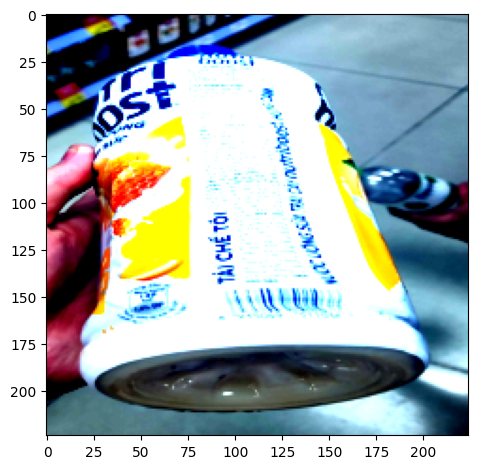

In [36]:
viz_utils.plot_image(support_images[support_labels == 52][0].detach().numpy().transpose(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906..2.4308496].


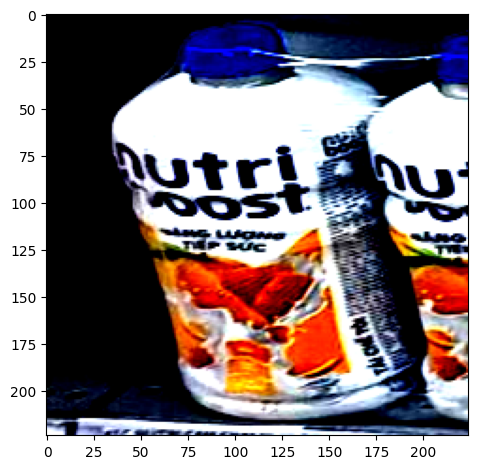

In [28]:
query_images, query_labels = next(iter(val_dataloader))
viz_utils.plot_image(query_images[0].detach().numpy().transpose(1, 2, 0))